## Inference

In the probabilistic approach to machine learning, all unknown quantities—predictions about the future, hidden states of a system, or parameters of a model—are treated as random variables, and endowed with probability distributions. The process of inference corresponds to computing the posterior distribution over these quantities, conditioning on whatever data is available. Given that the posterior is a probability distribution, we can draw samples from it. The samples in this case are parameter values. The Bayesian formalism treats parameter distributions as the degrees of relative plausibility, i.e., if this parameter is chosen, how likely is the data to have arisen? We use Bayes' rule for this process of inference. Let $h$ represent the uknown variables and $D$ the known variables, i.e., the data. Given a likelihood $p(D|h)$ and a prior $p(h)$, we can compute the posterior $p(h|D)$ using Bayes' rule:

$$p(h|D) = \frac{p(D|h)p(h)}{p(D)}$$

The main problem is the $p(D)$ in the demoninator. $p(D)$ is a normalization constant and ensures the probability distribution sums to 1. When the number of unknown variables $h$ is large, computing $p(D)$ requires a high dimensional integral of the form:

$$p(D) = \int p(D|h)p(h)dh$$

The integral is needed to convert the unnormalized joint probability of some parameter value $p(h, D)$ to a normalized probability $p(h|D)$. This also allows us to take into account all the other plausible values of $h$ that could have generated the data. There are three ways for computing the posterior:

1. Analytical Solution
2. Grid Approximation
3. Approximate Inference

Many problems are complex and require a model where computing the posterior distribution using a grid of parameters or in exact mathematical form is not feasible (or possible). Therefore, you adopt the approximate inference / sampling approach. The sampling approach has a major benefit. Working with samples transforms a problem in calculus $\rightarrow$ into a problem of data summary $\rightarrow$ into a frequency format problem. An integral in a typical Bayesian context is just the total probability in some interval. Once you have samples from the probability distribution, it’s just a matter of counting values in the interval. Therefore, once you fit a model to the data using some sampling algorithm, then interpreting the model is a matter of interpreting the frequency of parameter samples (though this is easier said than done).

To gain a better conceptual understanding of algorithmic techniques for computing (approximate) posteriors, I will be diving deeper into the main inference algorithms over the next couple of posts. 

### Monte Carlo Approximation

As discussed above, it is often difficult to compute the posterior distribution analytically. In this example, suppose $x$ is a random variable, and $y = f(x)$ is some function of $x$. Here, $y$ is our target distribution (think the posterior). Instead of computing $p(y)$ analytically, it is possible to draw a large number of samples from $p(x)$, and then use these samples to approximate $p(y)$. 

If $x$ is distributed uniformly in an interval between $-1, 1$ and $y = f(x) = x^2$, we can approximate $p(y)$ by drawing samples from $p(x)$. By using a large number of samples, a good approximation can be computed. 

In [8]:
#| code-fold: true
def plot_mc(x_samples, probs_x, true_y, pdf_y, approx_y):

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))

    ax[0].set_title('True Uniform Distribution')
    ax[0].plot(x_samples, probs_x)
    ax[0].set_xlabel('$x$')
    ax[0].set_ylabel('$p(x)$')

    ax[1].set_title('True $y$ PDF')
    ax[1].plot(true_y, pdf_y)
    ax[1].set_xlabel('$y$')
    ax[1].set_ylabel('$p(y)$')

    ax[2].set_title('Approximated $y$ PDF')
    ax[2].hist(approx_y, bins=30, density=True)
    ax[2].set_xlabel('$y$')
    ax[2].set_ylabel('$p(y)$')

    plt.tight_layout()
    plt.show()

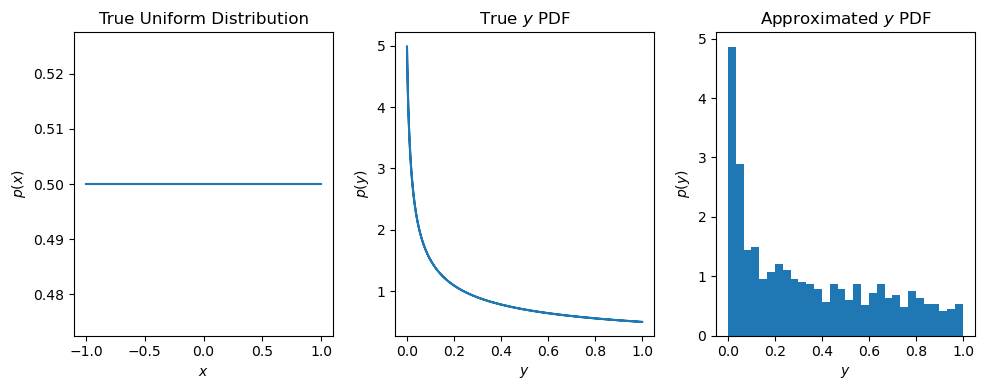

In [28]:
def main():
    
    square_func = lambda x: x**2

    # True p(x) 
    lower, upper = -1, 1
    x_samples = np.linspace(lower, upper, 200)
    
    # Analytical solution
    probs_x = 1 / (upper - lower) * np.ones(len(x_samples)) # p(X = x)
    true_y = square_func(x_samples) # true output y
    pdf_y = 1 / (2 * np.sqrt(true_y + 1e-2)) # true pdf of output y

    # Approximation p(y) 
    uniform_samples = np.random.uniform(-1, 1, 1000) # sample from Uniform
    approx_y = square_func(uniform_samples) # approx. output y

    plot_mc(x_samples, probs_x, true_y, pdf_y, approx_y)

main()

### Explanation of Code

1. First, define the squaring function $f(x)$ as `square_func`
2. `x_samples` is an array of 200 samples in the interval $[-1, 1]$
3. The probability of each element in `x_samples`: $p(X=x)$ is computed 
4. Compute `true_y` using the known `x_samples`
5. Compute the empirical probability density of the output `true_y`. 
6. Draw 1000 samples from a Uniform distribution 
7. Use these samples to approximate `approx_y` the empirical probability density